# Hold-out Cross-validation
In hold-out cross-validation, the entire dataset is splitted into three parts: train, validation and test. The machine learning model with different hyper-parameter settings is trained on the train split and evaluated on the validation split. The hyper-parameter setting with best validation score is chosen. Finally, the model with the best set of hyper-parameters are trained on combined data of train and validation split, and evaluated on the test split.

## Example of hold-out cross-validation

### Importing the necessary modules

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt

### Preparing the dataset

In [2]:
X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=30, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=15, random_state=0)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(105, 4)
(15, 4)
(30, 4)


### Computing the validation scores

In [4]:
C_list = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
train_scores = []
valid_scores = []
for C in C_list:
    clf = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    val_score = clf.score(X_valid, y_valid)
    train_scores.append(tr_score)
    valid_scores.append(val_score)

### Plotting the validation scores

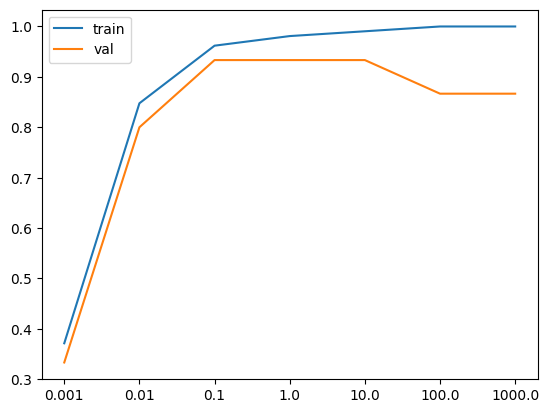

In [5]:
plt.plot(train_scores, label='train')
plt.plot(valid_scores, label='val')
plt.xticks(range(len(C_list)), C_list)
plt.legend()

### Re-fitting to the train and validation data

In [6]:
X_train = np.concatenate([X_train, X_valid], axis=0)
y_train = np.concatenate([y_train, y_valid], axis=0)
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [7]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

1.0


# K-Fold Cross-Validation
In K-fold cross-validation, the training data is randomly divided into $K$ equal folds. Then, $K$ different machine learning models are trained by considering the data of one fold as validation set and the rest as train set. The evarage of the $K$ validation scores is taken as the final validation score.

<p align="center">
  <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="Illustration of Cross-validation" width=50%/>
</p>

Scikit-learn has provided several APIs for performing cross-validation: [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score), [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate), [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict) etc. You can also refer to [this page](https://scikit-learn.org/stable/modules/cross_validation.html) for a comprehensive guide of cross-validation using Scikit-learn.


## K-Fold Cross-Validation Example

### Importing the necessary modules

In [8]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

### Preparing the data

In [9]:
X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


### Creating the model

In [10]:
lasso = linear_model.Lasso()

### Single metric evaluation using cross_validate

In [11]:
cv_results = cross_validate(estimator=lasso,
                            X=X_train,
                            y=y_train,
                            scoring=None,
                            cv=5,
                            return_estimator=False,
                            return_train_score=False)

In [12]:
type(cv_results)

dict

In [13]:
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [14]:
cv_results['test_score']

array([0.38767484, 0.42507232, 0.3471928 , 0.4167152 , 0.38657608])

### Multiple metric evaluation using cross_validate

In [15]:
cv_results = cross_validate(lasso, X, y, cv=3,
                            scoring=('r2', 'neg_mean_squared_error'),
                            return_train_score=True)

In [16]:
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_neg_mean_squared_error', 'train_neg_mean_squared_error'])

In [17]:
print(cv_results['test_neg_mean_squared_error'])
print(cv_results['train_r2'])

[-3742.49195255 -4142.27800178 -3595.55175714]
[0.38131603 0.34105946 0.35985285]


# Grid Search with Cross-Validation
In grid search of hyper-parameters with cross-validation, the cross-validation is performed for each hyper-parameter setting from a set of hyper-parameter settings. The hyper-parameter setting which provides the best validation scores is selected. Scikit-learn provides the API [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) for grid search cross-validation.

## Example of GridSearchCV

### Importing the necessary modules

In [18]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

### Preparing the data

In [19]:
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


### Creating the classifier

In [20]:
svc = svm.SVC()

### Grid search CV

In [21]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
search = GridSearchCV(estimator=svc,
                      param_grid=parameters,
                      scoring=None,
                      cv=5,
                      refit=True)
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [22]:
search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [23]:
search.cv_results_['mean_test_score']

array([0.95      , 0.95833333, 0.95833333, 0.95      ])

In [24]:
search.best_estimator_

SVC(C=1)

In [25]:
search.best_score_

0.9583333333333334

In [26]:
search.best_params_

{'C': 1, 'kernel': 'rbf'}

In [27]:
search.predict(X_test[:5])

array([2, 1, 0, 2, 0])

In [28]:
search.score(X_test, y_test)

1.0

# Random Search with Cross-Validation
In randomize hyper-parameter search with cross-validation, the cross-validation is performed by randomly sampling a small number of hyper-parameter settings from a distribution over the set of hyper-parameter settings. As in grid search CV, the hyper-parameter setting which provides the best validation scores is selected. Scikit-learn provides the API [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV) for random search cross-validation.

## Example of RandomizedSearchCV

### Importing the necessary modules

In [29]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

### Preparing the data

In [30]:
X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


### Creating the model

In [31]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)

### The randomized CV

In [32]:
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(estimator=logistic,
                         param_distributions=distributions,
                         n_iter=10,
                         scoring=None,
                         refit=True,
                         cv=None,
                         return_train_score=False)
search = clf.fit(X_train, y_train)

In [33]:
search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_penalty', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [34]:
search.cv_results_['mean_test_score']

array([0.95833333, 0.95833333, 0.925     , 0.96666667, 0.95      ,
       0.95833333, 0.96666667, 0.95833333, 0.95833333, 0.96666667])

In [35]:
search.best_params_

{'C': 1.375660875197883, 'penalty': 'l2'}

In [36]:
search.best_estimator_

LogisticRegression(C=1.375660875197883, max_iter=200, random_state=0,
                   solver='saga', tol=0.01)

In [37]:
search.best_score_

0.9666666666666666

In [38]:
search.refit_time_

0.001993417739868164

In [39]:
search.predict(X_test[:5])

array([2, 1, 0, 2, 0])

In [40]:
search.score(X_test, y_test)

1.0

# Comparing randomized search and grid search for hyperparameter estimation
The original code can be found [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py).

### Importing the modules

In [41]:
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier

### Preparing the Dataset

In [42]:
X, y = load_digits(return_X_y=True, n_class=3)

### Building the classifier

In [43]:
clf = SGDClassifier(loss="hinge", penalty="elasticnet", fit_intercept=True)

### Defining the utility function

In [44]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

### Randomized Search

In [45]:
# specify parameters and distributions to sample from
param_dist = {
    "average": [True, False],
    "l1_ratio": stats.uniform(0, 1),
    "alpha": loguniform(1e-2, 1e0),
}

# run randomized search
random_search = RandomizedSearchCV(
    clf,
    param_distributions=param_dist,
    n_iter=15,
    random_state=2
)

start = time()
random_search.fit(X, y)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), 15)
)
report(random_search.cv_results_)

RandomizedSearchCV took 1.39 seconds for 15 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.991 (std: 0.010)
Parameters: {'alpha': 0.06525528106404709, 'average': False, 'l1_ratio': 0.079645477009061}

Model with rank: 2
Mean validation score: 0.980 (std: 0.012)
Parameters: {'alpha': 0.017374050727190404, 'average': False, 'l1_ratio': 0.26682727510286663}

Model with rank: 3
Mean validation score: 0.976 (std: 0.024)
Parameters: {'alpha': 0.05939984370303659, 'average': True, 'l1_ratio': 0.9908519951999498}



### Grid Search

In [46]:
# use a full grid over all parameters
param_grid = {
    "average": [True, False],
    "l1_ratio": np.linspace(0, 1, num=10),
    "alpha": np.power(10, np.arange(-2, 1, dtype=float)),
}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print(
    "GridSearchCV took %.2f seconds for %d candidate parameter settings."
    % (time() - start, len(grid_search.cv_results_["params"]))
)
report(grid_search.cv_results_)

GridSearchCV took 4.56 seconds for 60 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.993 (std: 0.007)
Parameters: {'alpha': 0.1, 'average': False, 'l1_ratio': 0.2222222222222222}

Model with rank: 2
Mean validation score: 0.991 (std: 0.008)
Parameters: {'alpha': 0.1, 'average': False, 'l1_ratio': 0.0}

Model with rank: 3
Mean validation score: 0.989 (std: 0.014)
Parameters: {'alpha': 0.1, 'average': False, 'l1_ratio': 0.4444444444444444}

Model with rank: 3
Mean validation score: 0.989 (std: 0.015)
Parameters: {'alpha': 0.1, 'average': False, 'l1_ratio': 0.7777777777777777}

